In [82]:
# === Imports ===
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error)

In [83]:
# === DataFrame ===
students_perfomance = pd.read_csv(r'C:\Users\Admin64\Desktop\WorkSpace\project\Python\math_score_predictor\data\StudentsPerformance.csv')
students_perfomance.rename(columns={
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}, inplace=True)

students_perfomance.head(5)


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
students_perfomance.info()
students_perfomance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [85]:
# === Data preprocessing ===
features = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course','reading_score', 'writing_score']
target = 'math_score'

X = pd.get_dummies(students_perfomance[features], drop_first=True, dtype=int)
y = students_perfomance[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


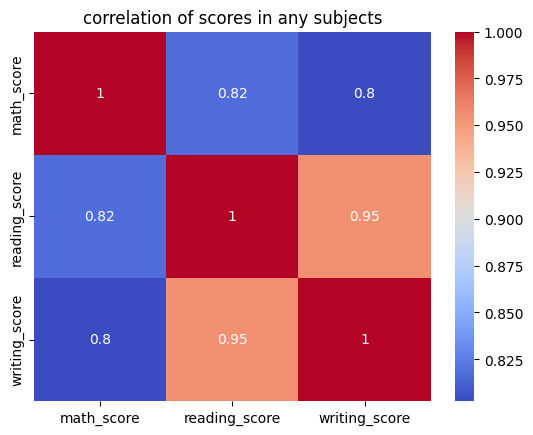

In [86]:
# === Visualisation ===

scores = students_perfomance[['math_score', 'reading_score', 'writing_score']]
sns.heatmap(scores.corr(), annot=True, cmap='coolwarm')
plt.title('correlation of scores in any subjects')
plt.show()

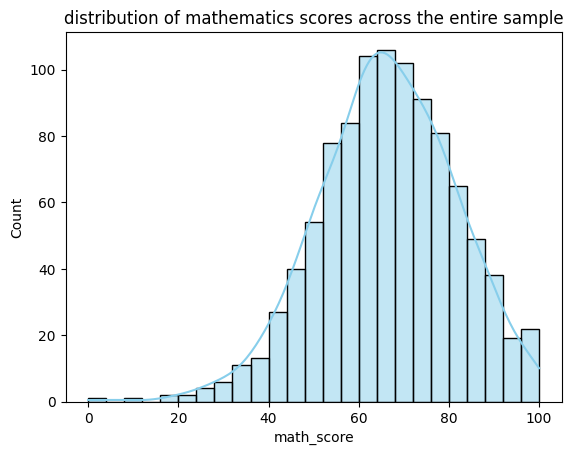

In [87]:

sns.histplot(students_perfomance['math_score'], kde=True, color='skyblue')
plt.title('distribution of mathematics scores across the entire sample')
plt.show()

<Axes: ylabel='Count'>

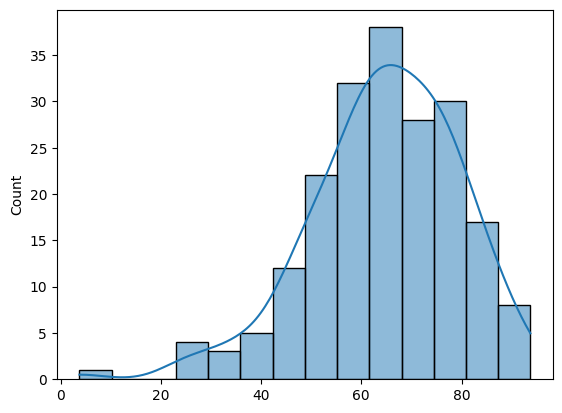

In [88]:
# === Model ===
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
sns.histplot(y_pred, kde=True)


MAE: 4.21
MSE: 29.10
R²: 0.88


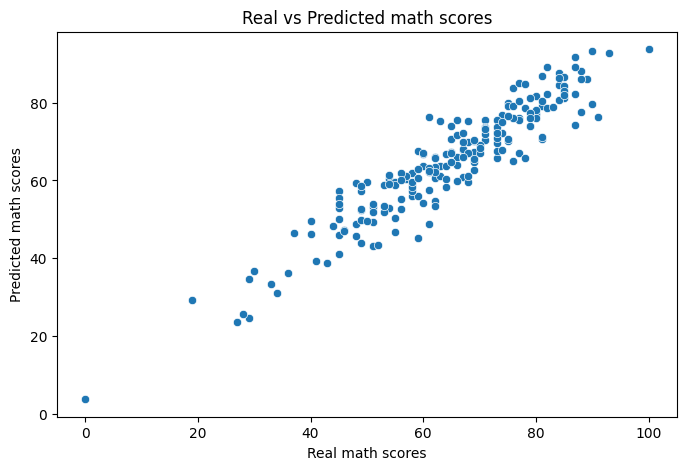

In [93]:
# === Metrics ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Real math scores')
plt.ylabel('Predicted math scores')
plt.title('Real vs Predicted math scores')
plt.show()
